In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
file_path = "/content/Experimental water adsorption isotherms.xlsx"
df = pd.read_excel(file_path)

In [4]:
def peleg_model(aw, b0, b1, b2, b3):
    return (b0 * aw**b1) / (b2 + b3 * aw**b1)

def dlp_model(aw, b0, b1, b2, b3):
    x = np.log(-np.log(aw))
    return b0 + b1*x + b2*x**2 + b3*x**3

In [5]:
types = df["Type"].unique()
for t in types:

    data = df[df["Type"] == t]
    aw = data["Water activity"].values
    Xe = data["Moisture content (% dry basis)"].values
    p0_peleg = [1, 1, 1, 1]
    popt_peleg, _ = curve_fit(peleg_model, aw, Xe, p0=p0_peleg)

    p0_dlp = [1, 1, 1, 1]
    popt_dlp, _ = curve_fit(dlp_model, aw, Xe, p0=p0_dlp)

    aw_fit = np.linspace(min(aw), max(aw), 200)
    Xe_peleg = peleg_model(aw_fit, *popt_peleg)
    Xe_dlp = dlp_model(aw_fit, *popt_dlp)


In [8]:
chi2_peleg = np.sum((Xe - peleg_model(aw, *popt_peleg))**2)
chi2_dlp = np.sum((Xe - dlp_model(aw, *popt_dlp))**2)

print(f"\n===== {t} =====")
print("PELEG PARAMETERS:", popt_peleg)
print("Chi² Peleg:", chi2_peleg)
print("DLP PARAMETERS:", popt_dlp)
print("Chi² DLP:", chi2_dlp)



===== Ground-Fine =====
PELEG PARAMETERS: [ 1.47950179  1.40248032  0.44159964 -0.42022536]
Chi² Peleg: 455.05812335472183
DLP PARAMETERS: [ 1.11527588 -1.42121882  1.73581049 -0.27330228]
Chi² DLP: 423.34953819066254


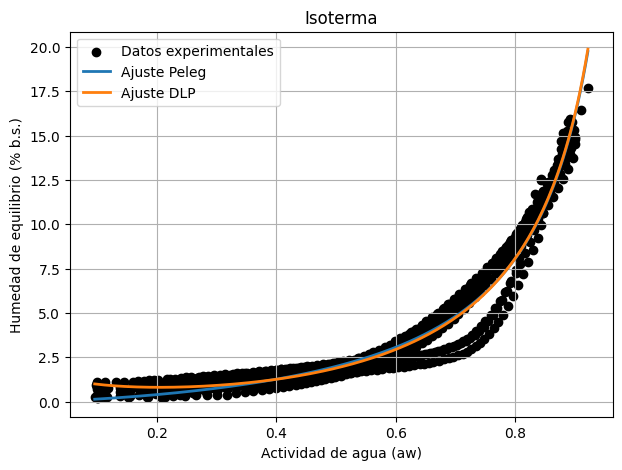

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(aw, Xe, label="Datos experimentales", color="black")
plt.plot(aw_fit, Xe_peleg, label="Ajuste Peleg", linewidth=2)
plt.plot(aw_fit, Xe_dlp, label="Ajuste DLP", linewidth=2)
plt.title(f"Isoterma")
plt.xlabel("Actividad de agua (aw)")
plt.ylabel("Humedad de equilibrio (% b.s.)")
plt.legend()
plt.grid(True)
plt.show()